In [1]:
import numpy as np
import pandas as pd
# import itertools 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib notebook
from tabulate import tabulate

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn import preprocessing
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import GridSearchCV

from scipy import stats
# from scipy.spatial import distance


## Functions

In [2]:
def uploadDatabase(place,samples,people,NoPCA,new):
    resultsTest=pd.read_csv(place+"_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

    for i in range(2,people+1):
        auxFrame=pd.read_csv(place+"_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    for j in range(2,4):
        for i in range(1,people+1):
            auxFrame=pd.read_csv(place+"_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))

    
    return analysisResults(resultsTest.drop(columns='Unnamed: 0'),NoPCA,new)


def analysisResults(resultDatabase,NoPCA,new):
    resultsLDA= pd.DataFrame(columns=['Feature Set', '# shots']) 
    resultsQDA= pd.DataFrame(columns=['Feature Set', '# shots']) 
    timeM= pd.DataFrame(columns=[]) 
#     if new==1:
#         wLDA='wTargetL'
#         wQDA='wTargetQ'
#     else:
#         wLDA='wMeanLDA'
#         wQDA='wMeanQDA'
        
    if NoPCA:
        
        idx=0
        for j in range(1,4):
            for i in range(1,5):

                resultsLDA.at[idx,'Feature Set']=j
                resultsLDA.at[idx,'# shots']=i

                resultsQDA.at[idx,'Feature Set']=j
                resultsQDA.at[idx,'# shots']=i




                resultsLDA.at[idx,'Acc(Few)']=resultDatabase['AccLDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Acc(PK+Few)']=resultDatabase['AccLDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Acc(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Std(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].std(axis=0)

                
                resultsQDA.at[idx,'Acc(Few)']=resultDatabase['AccQDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'Acc(PK+Few)']=resultDatabase['AccQDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
               
                resultsLDA.at[idx,'Acc(Prop)']=resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Std(Prop)']=resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].std(axis=0)
                



                T_test=stats.ttest_ind(resultDatabase['AccLDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsLDA.at[idx,'T-test (Prop_Few)']=0
                else:
                    resultsLDA.at[idx,'T-test (Prop_Few)']=1
                    
                T_test=stats.ttest_ind(resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsLDA.at[idx,'T-test (Prop_Liu)']=0
                else:
                    resultsLDA.at[idx,'T-test (Prop_Liu)']=1    
                    
                
                T_test=stats.ttest_ind(resultDatabase['AccLDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsLDA.at[idx,'T-test (Prop_PK+Few)']=0
                else:
                    resultsLDA.at[idx,'T-test (Prop_PK+Few)']=1

                
                resultsLDA.at[idx,'wMeanLDA']=resultDatabase['wTargetMeanLDA'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                
                resultsLDA.at[idx,'t(Prop)']=resultDatabase['tPropL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                
                resultsLDA.at[idx,'t(PK+Few)']=resultDatabase['tGenL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                

                idx+=1
                
            
    else:
        
        idx=0
        for j in range(1,4):
            for i in range(1,5):

                resultsLDA.at[idx,'Feature Set']=j
                resultsLDA.at[idx,'# shots']=i

                resultsQDA.at[idx,'Feature Set']=j
                resultsQDA.at[idx,'# shots']=i




                resultsLDA.at[idx,'Acc(Few)']=resultDatabase['AccLDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Acc(PK+Few)']=resultDatabase['AccLDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Acc(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsLDA.at[idx,'Std(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].std(axis=0)
                resultsLDA.at[idx,'AccMedian(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].median(axis=0)
                resultsLDA.at[idx,'AccMax(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].max(axis=0)
                resultsLDA.at[idx,'AccMin(Liu)']=resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].min(axis=0)
                
                
                resultsQDA.at[idx,'Acc(Few)']=resultDatabase['AccQDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'Acc(PK+Few)']=resultDatabase['AccQDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'Acc(Liu_QDA)']=resultDatabase['AccQDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)

                resultsLDA.at[idx,'Acc(Prop)']=resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'Acc(Prop)']=resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'Std(Prop)']=resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].std(axis=0)




                T_test=stats.ttest_ind(resultDatabase['AccLDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsLDA.at[idx,'T-test (Prop_Few)']=0
                else:
                    resultsLDA.at[idx,'T-test (Prop_Few)']=1
                    
                T_test=stats.ttest_ind(resultDatabase['AccLDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsLDA.at[idx,'T-test (Prop_Liu)']=0
                else:
                    resultsLDA.at[idx,'T-test (Prop_Liu)']=1
                    
                
                T_test=stats.ttest_ind(resultDatabase['AccLDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccLDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsLDA.at[idx,'T-test (Prop_PK+Few)']=0
                else:
                    resultsLDA.at[idx,'T-test (Prop_PK+Few)']=1

                T_test=stats.ttest_ind(resultDatabase['AccQDAInd'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsQDA.at[idx,'T-test (Prop_Few)']=0
                else:
                    resultsQDA.at[idx,'T-test (Prop_Few)']=1
                    
                T_test=stats.ttest_ind(resultDatabase['AccQDALiu'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsQDA.at[idx,'T-test (Prop_Liu)']=0
                else:
                    resultsQDA.at[idx,'T-test (Prop_Liu)']=1    
                    
                
                T_test=stats.ttest_ind(resultDatabase['AccQDAGen'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values
                                  ,resultDatabase['AccQDAProp'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].values)[1]
                if T_test<0.05:
                    resultsQDA.at[idx,'T-test (Prop_PK+Few)']=0
                else:
                    resultsQDA.at[idx,'T-test (Prop_PK+Few)']=1

                resultsLDA.at[idx,'wMeanLDA']=resultDatabase['wTargetMeanLDA'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'wMeanQDA']=resultDatabase['wTargetMeanQDA'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)            

                resultsLDA.at[idx,'t(Prop)']=resultDatabase['tPropL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'t(Prop)']=resultDatabase['tPropQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)

                resultsLDA.at[idx,'t(PK+Few)']=resultDatabase['tGenL'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                resultsQDA.at[idx,'t(PK+Few)']=resultDatabase['tGenQ'].loc[(resultDatabase['# shots'] == i)&(resultDatabase['Feature Set'] == j)].mean(axis=0)
                
                

                idx+=1
                
            print('Feature '+str(j))
            print('Mean ',np.mean(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
#             print('Var Feature '+str(j),np.var(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
            print('Min ',np.min(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
            print('Max ',np.max(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)]))
            
                    
            
            timeM.at[3*j+0,'meanL']=resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)].median(axis=0)
            timeM.at[3*j+0,'meanQ']=resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
            timeM.at[3*j+0,'varL']=resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
            timeM.at[3*j+0,'varQ']=resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)].max(axis=0)
            timeM.at[3*j+0,'minL']=np.min(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'minQ']=np.min(resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'maxL']=np.max(resultDatabase['tPropL'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'maxQ']=np.max(resultDatabase['tPropQ'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+1,'meanL']=resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
            timeM.at[3*j+1,'meanQ']=resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
            timeM.at[3*j+1,'varL']=resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
            timeM.at[3*j+1,'varQ']=resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
            timeM.at[3*j+0,'minL']=np.min(resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'minQ']=np.min(resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'maxL']=np.max(resultDatabase['tIndL'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'maxQ']=np.max(resultDatabase['tIndQ'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+2,'meanL']=resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
            timeM.at[3*j+2,'meanQ']=resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)].mean(axis=0)
            timeM.at[3*j+2,'varL']=resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
            timeM.at[3*j+2,'varQ']=resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)].var(axis=0)
            timeM.at[3*j+0,'minL']=np.min(resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'minQ']=np.min(resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'maxL']=np.max(resultDatabase['tGenL'].loc[(resultDatabase['Feature Set'] == j)])
            timeM.at[3*j+0,'maxQ']=np.max(resultDatabase['tGenQ'].loc[(resultDatabase['Feature Set'] == j)])
            
                
    return resultsLDA, resultsQDA,timeM



def graphIndividuals(classifier):
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey='row', figsize=(9, 6))
    shot=np.arange(1,5)
    for Data in range(FeatureSetM):
        if Data==0:
            resultsLDA=resultsNina5LDA
            resultsQDA=resultsNina5QDA
            resultsLDAnoPCA=resultsNina5LDAnoPCA
            resultsQDAnoPCA=resultsNina5QDAnoPCA
        elif Data==1:
            resultsLDA=resultsCoteLDA
            resultsQDA=resultsCoteQDA
            resultsLDAnoPCA=resultsCoteLDAnoPCA
            resultsQDAnoPCA=resultsCoteQDAnoPCA
        elif Data==2:
            resultsLDA=resultsEPNLDA
            resultsQDA=resultsEPNQDA
            resultsLDAnoPCA=resultsEPNLDAnoPCA
            resultsQDAnoPCA=resultsEPNQDAnoPCA
        for FeatureSet in range(FeatureSetM):
             
                       
                
            
            if classifier == 'LDA':
                
                

                Model='Acc(Few)'
                
                Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
                Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')

                
                


                Model='Acc(PK+Few)'
                Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
                Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')

                
                

            elif classifier == 'QDA':

                Model='Acc(Few)'
                Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
                Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')            

                
                     


                Model='Acc(PK+Few)'
                Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
                Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')            

                
                



                     
        
            ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            ax[Data,FeatureSet].grid()
#             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0, 2, 1))
            ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,4.2 , 1))
    ax[2,0].set_xlabel('shots')
    ax[2,1].set_xlabel('shots')
    ax[2,2].set_xlabel('shots')
    ax[0,0].set_title('Feature Set 1')
    ax[0,1].set_title('Feature Set 2')
    ax[0,2].set_title('Feature Set 3')
    ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
    ax[2,0].set_ylabel('EPN EC\n\naccuracy')
    ax[0,2].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[0,2].legend(loc='best',prop={'size': 7}) 
#     ax[1,2].legend(loc='best',prop={'size': 7}) 
#     ax[2,2].legend(loc='best',prop={'size': 7})  
    fig.tight_layout(pad=0.1)
    plt.show()

def labelPoint(xs,ys,ax1):
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-5), # distance from text to points (x,y)
                     ha='center',
                    fontsize='small') # horizontal alignment can be left, right or center

def labelPointA(xs,ys,ax1,std):
    idx=0
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)
        stdi = "{:.2f}".format(std[idx])

        ax1.annotate(label+'±'+str(stdi), # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-5), # distance from text to points (x,y)
                     ha='center',
                    fontsize='small') # horizontal alignment can be left, right or center
        idx+=1


def graphsDatabases():
    FeatureSetM=3
    shot=np.arange(1,5)
    
    for Data in range(FeatureSetM):
        if Data==0:
            resultsLDA=resultsNina5LDAnoPCA       
            resultsQDA=resultsNina5QDA
            fig1 , ax = plt.subplots(nrows=4, ncols=3,sharex=True, sharey='row',  figsize=(9, 7))
            ModelTxt='NinaPro5'
            start=0.45
            end=0.7
            step=0.05
        elif Data==1:
            resultsLDA=resultsCoteLDAnoPCA 
            resultsQDA=resultsCoteQDA
            fig2 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
            ModelTxt='Cote Allard'
            start=0.83
            end=1
            step=0.05
        elif Data==2:
            resultsLDA=resultsEPNLDAnoPCA
            resultsQDA=resultsEPNQDA
            fig3 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
            ModelTxt='EPN EC'
            start=0.84
            end=1
            step=0.05
        for F in range(FeatureSetM):
            FeatureSet=F+1

            yPropLDA=np.array(resultsLDA['Acc(Prop)'].loc[resultsLDA['Feature Set']==FeatureSet])
            yLiu=np.array(resultsLDA['Acc(Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
            yLDA=np.array(resultsLDA['Acc(Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             yLDApk=np.array(resultsLDA['Acc(PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])

            yPropQDA=np.array(resultsQDA['Acc(Prop)'].loc[resultsQDA['Feature Set']==FeatureSet])
            yLiuQ=np.array(resultsQDA['Acc(Liu_QDA)'].loc[resultsQDA['Feature Set']==FeatureSet])
            yQDA=np.array(resultsQDA['Acc(Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             yQDApk=np.array(resultsQDA['Acc(PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])



#             wPropLDA=np.array(resultsLDA['wMeanLDA'].loc[resultsLDA['Feature Set']==FeatureSet])
#             wPropQDA=np.array(resultsQDA['wMeanQDA'].loc[resultsQDA['Feature Set']==FeatureSet])
#             wLiu=np.ones(4)*0.5

            
            tT_PropBlLDA=np.array(resultsLDA['T-test (Prop_Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
            tT_PropBlQDA=np.array(resultsQDA['T-test (Prop_Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
            tT_PropLiuLDA=np.array(resultsLDA['T-test (Prop_Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
            tT_PropLiuQDA=np.array(resultsQDA['T-test (Prop_Liu)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             tT_PropPkLDA=np.array(resultsLDA['T-test (Prop_PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             tT_PropPkQDA=np.array(resultsQDA['T-test (Prop_PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])







            

            ax[0,F].plot(shot, yPropLDA, label='Adaptive',marker='^',color='green')
#             labelPoint(shot,yPropLDA,ax[0,F])
            
            ax[0,F].plot(shot, yLDA, label='BL: Individual',marker='x',color='red')
#             labelPoint(shot,yLDA,ax[0,F])
#             ax[0,F].plot(shot, yLiu, label='Liu',marker='v',color='orange')
#             labelPoint(shot,yLiu,ax[0,F])
#             ax[0,F].plot(shot, yLDApk, label='BL (PK+Few)',marker='^',color='red')
#             labelPoint(shot,yLDApk,ax[0,F])
#             ax[0,F].yaxis.set_ticks(np.arange(start, end, step))
            ax[0,F].grid()
            ax[0,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
#             ax2 = ax[0,F].twinx()
            ax[1,F].plot(shot, tT_PropBlLDA, label='H0 (Adaptive-BL)',marker='x',color='red')
#             ax[1,F].plot(shot, tT_PropLiuLDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
#             ax2.plot(shot, tT_PropPkLDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
            ax[1,F].set_ylim([-0.1, 1.1])
            ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
            ax[1,F].grid()
            if F<=1:
                ax[1,F].set_yticklabels([])
            if F==2:
#                 ax[1,F].set_ylabel('Null Hypothesis')
                ax[1,F].yaxis.set_ticks(np.arange(0, 2, 1))
                ax[1,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)

            
            
            
            
#             ax[1,F].plot(shot, 1-wPropLDA , label='w (Proposed)',color='green')
# #             labelPoint(shot,1-wPropLDA,ax[1,F])
# #             ax[1,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
#             ax[1,F].grid()
#             ax[1,F].set_ylim([0.05, 0.55])
#             ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
            
            
            

            ax[2,F].plot(shot, yPropQDA, label='Adaptive',marker='o',color='green')
#             labelPoint(shot,yPropQDA,ax[2,F])
            ax[2,F].plot(shot, yQDA, label='BL: PCA_Individual',marker='o',color='blue')
#             labelPoint(shot,yQDA,ax[2,F])
#             ax[2,F].plot(shot, yLiuQ, label='Liu',marker='v',color='orange')
#             labelPoint(shot,yLiuQ,ax[2,F])
            
#             ax[2,F].plot(shot, yQDApk, label='BL (PK+Few)',marker='^',color='red')
#             labelPoint(shot,yQDApk,ax[2,F])
            
#             ax[2,F].yaxis.set_ticks(np.arange(start, end, step))
            ax[2,F].grid()
            ax[2,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
            
#             ax3 = ax[1,F].twinx()
            ax[3,F].plot(shot, tT_PropBlQDA, label='H0 (Adaptive-BL)',marker='o',color='blue')
#             ax[3,F].plot(shot, tT_PropLiuQDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
            
#             ax3.plot(shot, tT_PropPkQDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
            ax[3,F].set_ylim([-0.1, 1.1])
            ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
            ax[3,F].grid()
            if F<=1:
                ax[3,F].set_yticklabels([])
            if F==2:
#                 ax[3,F].set_ylabel('Null hypothesis')
                ax[3,F].yaxis.set_ticks(np.arange(0, 2, 1))
                ax[3,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)
            
            
            
                
            
#             ax[3,F].plot(shot, 1-wPropQDA , label='w (Proposed)',color='green')
# #             labelPoint(shot,1-wPropQDA,ax[3,F])
# #             ax[3,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
#             ax[3,F].grid()
#             ax[3,F].set_ylim([0.05, 0.55])
#             ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
        
        
        
        ax[0,0].set_ylabel('LDA\n\naccuracy')
        ax[1,0].set_ylabel('LDA\n\nnull hypothesis')
        ax[2,0].set_ylabel('QDA\n\naccuracy')
        ax[3,0].set_ylabel('QDA\n\nnull hypothesis')
        ax[1,0].set_xlabel('shots')
        ax[1,1].set_xlabel('shots')
        ax[1,2].set_xlabel('shots')
        ax[0,0].set_title('Feature Set 1')
#         ax[0,1].set_title(ModelTxt+'\n\nFeature 2')
        ax[0,1].set_title('Feature Set 2')
        ax[0,2].set_title('Feature Set 3')
        ax[0,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[1,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[2,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[3,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
#         ax[2,2].legend(loc='lower right',prop={'size': 7})
#         ax[3,2].legend(loc='center right',prop={'size': 7})
        
    fig1.tight_layout(pad=0.4)
    fig2.tight_layout(pad=0.4)
    fig3.tight_layout(pad=0.4)
    plt.show()

    
    
def graphScientLiterat():
    
    fig , ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 8))
    shot=np.arange(1,5)
    for Database in range(3):
        if Database==0:
            proposedLDA=np.array(resultsNina5LDAnoPCA['Acc(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsNina5QDA['Acc(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
            liu=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
            STDproposedLDA=np.array(resultsNina5LDAnoPCA['Std(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsNina5QDA['Std(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
            STDliu=np.array(resultsNina5LDAnoPCA['Std(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
    #             liuLDA=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            cote=np.array([0.4941,0.6012,0.6516,0.6898])
            STDcote=np.array([0.0582,0.0479,0.0446,0.0409])
        elif Database==1:
            proposedLDA=np.array(resultsCoteLDAnoPCA['Acc(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsCoteQDA['Acc(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
            liu=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
            STDproposedLDA=np.array(resultsCoteLDAnoPCA['Std(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsCoteQDA['Std(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
            STDliu=np.array(resultsCoteLDAnoPCA['Std(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
    #             liuLDA=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            cote=np.array([0.9469,0.9663,0.9782,0.9831])
            STDcote=np.array([0.0558,0.0454,0.0241,0.0216])
        elif Database==2:
            proposedLDA=np.array(resultsEPNLDAnoPCA['Acc(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsEPNQDA['Acc(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
            liu=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])
            liuLDA=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            STDproposedLDA=np.array(resultsEPNLDAnoPCA['Std(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsEPNQDA['Std(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
            STDliu=np.array(resultsEPNLDAnoPCA['Std(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])





#         ax.errorbar(shot, proposedLDA, yerr=STD, uplims=True, lolims=True, label='Proposed LDA')
    
        
      
        
        ax[Database].errorbar(shot,proposedLDA,label='Proposed_LDA_3',marker='^',color='green')
#         labelPointA(shot,proposedLDA,ax[Database],STDproposedLDA)
        ax[Database].errorbar(shot,proposedQDA,label='Proposed_QDA_3',marker='o',color='green')
#         labelPointA(shot,proposedQDA,ax[Database],STDproposedQDA)
        ax[Database].errorbar(shot,liu,label='Liu',marker='v',color='orange')
#         labelPointA(shot,liu,ax[Database],STDliu)
#         ax[Database].plot(shot,liuLDA,label='Liu_LDA_3',marker='+')
#         labelPoint(shot,liuLDA,ax[Database])
        
        if Database != 2:
            ax[Database].errorbar(shot,cote,label='Cote Allard',marker='*',color='brown')
#             labelPointA(shot,cote,ax[Database],STDcote)
                          
        
        ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
        ax[Database].grid()
        ax[Database].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
    ax[2].set_xlabel('shots')
    ax[0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1].set_ylabel('Cote Allard\n\naccuracy')
    ax[2].set_ylabel('EPN EC\n\naccuracy')
    fig.tight_layout(pad=0.1)
    plt.show()

    
def graphTime(timeNina5,timeCote,timeEPN):
    
    timeNina5=timeNina5.reset_index(drop=True)
    timeCote=timeCote.reset_index(drop=True)
    timeEPN=timeEPN.reset_index(drop=True)
    fig , ax = plt.subplots(nrows=6, ncols=3, figsize=(9, 8))
    shot=np.arange(1,5)
    for Database in range(3):
        if Database==0:
            data=timeNina5        
        elif Database==1:
            data=timeCote
        elif Database==2:
            data=timeEPN




      
        mu=np.array(data['meanL'].loc[0])
        sigma=np.array(data['varL'].loc[0])
        x = np.linspace(mu - mu, mu + sigma, 100)
        ax[(Database+1)*2-2,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanL'].loc[1])
        sigma=np.array(data['varL'].loc[1])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-2,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanL'].loc[2])
        sigma=np.array(data['varL'].loc[2])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-2,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[0])
        sigma=np.array(data['varQ'].loc[0])
        x = np.linspace(mu - mu, mu + sigma, 100)
        ax[(Database+1)*2-1,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[1])
        sigma=np.array(data['varQ'].loc[1])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-1,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[2])
        sigma=np.array(data['varQ'].loc[2])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-1,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        
        
        
        
        
        
        
          
        
#         ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
#         ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
#         ax[Database].grid()
#     ax[,0].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

    ax[0,0].set_title('Adaptive')
    ax[0,1].set_title('BL: Individual')
    ax[0,2].set_title('BL: Multi-user')
    ax[5,0].set_xlabel('Time')
    ax[5,1].set_xlabel('Time')
    ax[5,2].set_xlabel('Time')
    ax[0,0].set_ylabel('NinaPro5\nLDA')
    ax[1,0].set_ylabel('NinaPro5\nQDA')
    ax[2,0].set_ylabel('Cote\nLDA')
    ax[3,0].set_ylabel('Cote\nQDA')
    ax[4,0].set_ylabel('EPN\nLDA')
    ax[5,0].set_ylabel('EPN\nQDA')
    
    fig.tight_layout(pad=0.1)
    plt.show()



### NinaPro5
Upload Database

In [3]:
samplesPerFile=15
people=10
NoPCA=False
place="Experiments/DatabasesEvaluation/Results1/NinaPro5_295_"
resultsNina5LDA,resultsNina5QDA,timeNina5=uploadDatabase(place,samplesPerFile,people,NoPCA,1)
NoPCA=True
place="Experiments/DatabasesEvaluation/Results1/NinaPro5_3NoPCA"
resultsNina5LDAnoPCA,resultsNina5QDAnoPCA,timeNina5noPCA=uploadDatabase(place,samplesPerFile,people,NoPCA,0)

Feature 1
Mean  130.8592117468516
Min  50.89461040496826
Max  258.7343685626984
Feature 2
Mean  99.12932261149089
Min  57.744690895080566
Max  263.72486567497253
Feature 3
Mean  111.46788613319397
Min  58.19908213615418
Max  247.5148606300354


LDA

In [4]:
resultsNina5LDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu),Std(Liu),AccMedian(Liu),AccMax(Liu),AccMin(Liu),Acc(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),wMeanLDA,t(Prop),t(PK+Few)
0,1,1,0.487576,0.281940,0.435076,0.077163,0.440392,0.593719,0.256307,0.493693,1.0,0.0,0.0,0.843957,144.777684,1.802875
1,1,2,0.514550,0.289296,0.443229,0.082224,0.452561,0.578635,0.267678,0.518633,1.0,0.0,0.0,0.861560,140.693297,1.695540
2,1,3,0.525884,0.296682,0.447179,0.083835,0.459544,0.562356,0.282974,0.531139,1.0,0.0,0.0,0.880767,111.435271,1.319901
3,1,4,0.532633,0.303314,0.449634,0.087908,0.462540,0.553619,0.303996,0.535869,1.0,0.0,0.0,0.879730,93.876575,1.300518
4,2,1,0.483475,0.296670,0.445251,0.081416,0.452173,0.624712,0.275286,0.480859,1.0,0.0,0.0,0.836572,111.893317,3.481131
5,2,2,0.518507,0.305634,0.458426,0.081738,0.459142,0.612760,0.280171,0.513861,1.0,0.0,0.0,0.866895,95.362326,2.596744
6,2,3,0.534499,0.313769,0.464003,0.081053,0.471394,0.599448,0.314487,0.528907,1.0,0.0,0.0,0.886018,96.105233,2.349626
7,2,4,0.542237,0.321642,0.466030,0.083350,0.471647,0.591823,0.342917,0.536460,1.0,0.0,0.0,0.885413,82.771683,1.945760
8,3,1,0.521676,0.327684,0.490450,0.066918,0.492442,0.638724,0.356210,0.516283,1.0,1.0,0.0,0.827020,114.280894,3.790436
9,3,2,0.556704,0.337799,0.505923,0.061295,0.501506,0.631141,0.385121,0.549662,1.0,0.0,0.0,0.840931,125.251041,3.317766


In [5]:
resultsNina5LDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu),Std(Liu),Acc(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),wMeanLDA,t(Prop),t(PK+Few)
0,1,1,0.478833,0.278243,0.427733,0.075421,0.487981,1.0,0.0,0.0,0.907894,56.181047,0.306943
1,1,2,0.505112,0.285089,0.435482,0.079891,0.513161,1.0,0.0,0.0,0.922381,53.474782,0.260783
2,1,3,0.515881,0.292117,0.439126,0.081922,0.524264,1.0,0.0,0.0,0.926165,62.894654,0.368251
3,1,4,0.522453,0.298406,0.441724,0.085852,0.531681,1.0,0.0,0.0,0.929264,65.303830,0.286473
4,2,1,0.474053,0.292461,0.437124,0.079826,0.473967,1.0,0.0,0.0,0.907351,55.263062,0.562741
5,2,2,0.507361,0.301128,0.449373,0.080263,0.505567,1.0,0.0,0.0,0.920851,50.800069,0.600248
6,2,3,0.522512,0.308872,0.454219,0.079143,0.518316,1.0,0.0,0.0,0.929059,68.985218,0.650765
7,2,4,0.530756,0.316739,0.456116,0.082589,0.532037,1.0,0.0,0.0,0.924733,53.737735,0.441973
8,3,1,0.517921,0.324452,0.486577,0.066431,0.517218,1.0,0.0,0.0,0.902595,52.447115,0.628362
9,3,2,0.551121,0.333414,0.502404,0.060202,0.550125,1.0,0.0,0.0,0.914830,64.721217,0.677769


QDA

In [5]:
resultsNina5QDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu_QDA),Acc(Prop),Std(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),wMeanQDA,t(Prop),t(PK+Few)
0,1,1,0.490149,0.290439,0.484100,0.507435,0.069739,1.0,1.0,0.0,0.773181,271.824576,0.519171
1,1,2,0.581075,0.316460,0.503129,0.563256,0.058815,1.0,0.0,0.0,0.809407,252.402521,0.504394
2,1,3,0.611117,0.336131,0.509322,0.591690,0.054362,1.0,0.0,0.0,0.826107,197.862696,0.388999
3,1,4,0.625591,0.351867,0.512933,0.606742,0.056570,1.0,0.0,0.0,0.837265,167.621807,0.386151
4,2,1,0.434539,0.286348,0.450442,0.483477,0.073285,0.0,1.0,0.0,0.745643,208.217652,0.956984
5,2,2,0.530071,0.312909,0.473986,0.527564,0.062392,1.0,0.0,0.0,0.793875,169.425294,0.797725
6,2,3,0.571880,0.332396,0.483117,0.558360,0.058755,1.0,0.0,0.0,0.810877,158.619113,0.747350
7,2,4,0.593357,0.347104,0.487558,0.573289,0.063246,1.0,0.0,0.0,0.815677,137.815877,0.653773
8,3,1,0.474916,0.325283,0.504826,0.531101,0.068257,0.0,1.0,0.0,0.738101,223.111401,1.039724
9,3,2,0.560390,0.355784,0.537318,0.573429,0.059558,1.0,0.0,0.0,0.812894,224.200447,1.033810


In [75]:
resultsNina5QDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu_QDA),Acc(Prop),Std(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),wMeanQDA,t(Prop),t(PK+Few)
0,1,1,0.490979,0.279539,0.465581,0.500390,0.059748,1.0,0.0,0.0,0.821758,56.813895,0.038872
1,1,2,0.570423,0.302624,0.483018,0.560583,0.051664,1.0,0.0,0.0,0.882680,60.798156,0.039472
2,1,3,0.595869,0.321715,0.489624,0.585921,0.053286,1.0,0.0,0.0,0.900737,57.952041,0.039363
3,1,4,0.607953,0.337879,0.492968,0.598230,0.058131,1.0,0.0,0.0,0.907802,51.244848,0.036758
4,2,1,0.426257,0.268806,0.432211,0.454578,0.067604,0.0,1.0,0.0,0.675217,67.127459,0.086438
5,2,2,0.521461,0.292550,0.452070,0.515972,0.055952,1.0,0.0,0.0,0.827765,69.326896,0.091250
6,2,3,0.559937,0.311484,0.460268,0.547489,0.054418,0.0,0.0,0.0,0.867110,66.339039,0.093262
7,2,4,0.578637,0.326770,0.464993,0.567615,0.058523,1.0,0.0,0.0,0.890779,54.628994,0.079559
8,3,1,0.467056,0.309251,0.494305,0.507570,0.061380,0.0,1.0,0.0,0.643327,66.101020,0.094194
9,3,2,0.552431,0.340388,0.524591,0.557872,0.053047,1.0,0.0,0.0,0.801907,66.404881,0.097141


### Upload Cote Allard

In [7]:
samples=15
people=17
NoPCA=False
place="Experiments/DatabasesEvaluation/Results1/Cote_3"
resultsCoteLDA,resultsCoteQDA,timeCote=uploadDatabase(place,samples,people,NoPCA,1)
NoPCA=True
place="Experiments/DatabasesEvaluation/Results1/Cote_NoPCA3"
resultsCoteLDAnoPCA,resultsCoteQDAnoPCA,timeCotenoPCA=uploadDatabase(place,samples,people,NoPCA,0)


Feature 1
Mean  8.395401387121163
Min  3.3837354183197017
Max  27.796342611312863
Feature 2
Mean  9.707468845330032
Min  3.825111389160156
Max  23.42409467697144
Feature 3
Mean  9.90022865931193
Min  3.846701383590698
Max  22.7767014503479


LDA

In [47]:
resultsCoteLDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu),Std(Liu),Acc(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),wMeanLDA,t(Prop),t(PK+Few)
0,1,1,0.899239,0.604520,0.857997,0.112373,0.908441,1.0,0.0,0.0,0.622254,9.736878,0.246022
1,1,2,0.925143,0.619083,0.865261,0.111681,0.923876,1.0,0.0,0.0,0.632712,7.527357,0.179564
2,1,3,0.936353,0.631995,0.867858,0.109780,0.931950,1.0,0.0,0.0,0.636459,8.615228,0.212429
3,1,4,0.943216,0.643054,0.869502,0.110156,0.935140,1.0,0.0,0.0,0.642798,7.358455,0.177903
4,2,1,0.929292,0.673095,0.890892,0.095661,0.933041,1.0,0.0,0.0,0.606653,11.058866,0.570380
5,2,2,0.955509,0.690728,0.900237,0.088149,0.949958,1.0,0.0,0.0,0.613713,9.560794,0.505992
6,2,3,0.966985,0.707316,0.903728,0.085846,0.958739,1.0,0.0,0.0,0.615145,9.201168,0.487672
7,2,4,0.973426,0.722571,0.906059,0.085662,0.961230,1.0,0.0,0.0,0.616874,7.207137,0.389404
8,3,1,0.944299,0.707169,0.940869,0.062148,0.954824,1.0,1.0,0.0,0.604743,12.177909,0.676027
9,3,2,0.966628,0.722986,0.951943,0.056080,0.967548,1.0,0.0,0.0,0.611250,9.954128,0.538865


QDA

In [48]:
resultsCoteQDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu_QDA),Acc(Prop),Std(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),wMeanQDA,t(Prop),t(PK+Few)
0,1,1,0.857162,0.647894,0.908576,0.917635,0.070209,0.0,1.0,0.0,0.570884,17.741751,0.063630
1,1,2,0.915600,0.704088,0.925037,0.942860,0.056716,0.0,1.0,0.0,0.599047,13.408444,0.047947
2,1,3,0.935911,0.749576,0.930940,0.951552,0.047854,1.0,0.0,0.0,0.615116,15.710161,0.054524
3,1,4,0.947464,0.780416,0.934176,0.955868,0.042831,1.0,1.0,0.0,0.631295,13.433846,0.044787
4,2,1,0.864339,0.672590,0.893969,0.909777,0.074697,0.0,1.0,0.0,0.561985,20.234978,0.180606
5,2,2,0.921591,0.721339,0.913005,0.939782,0.054851,0.0,0.0,0.0,0.592085,17.370450,0.154697
6,2,3,0.941791,0.755681,0.920134,0.950373,0.046885,1.0,0.0,0.0,0.610967,16.570250,0.149336
7,2,4,0.951575,0.782649,0.924668,0.955307,0.044224,1.0,1.0,0.0,0.623191,11.904152,0.114460
8,3,1,0.927704,0.720641,0.924226,0.937830,0.056731,1.0,1.0,0.0,0.550352,21.073786,0.204211
9,3,2,0.960904,0.784026,0.942375,0.962931,0.038823,1.0,0.0,0.0,0.591642,17.590206,0.169068


### Upload EPN

In [8]:
samples=50
people=60
NoPCA=False
place="Experiments/DatabasesEvaluation/Results1/EPN_3"
resultsEPNLDA,resultsEPNQDA,timeEPN=uploadDatabase(place,samples,people,NoPCA,1)
NoPCA=True
place="Experiments/DatabasesEvaluation/Results1/EPN_3NoPCA"
resultsEPNLDAnoPCA,resultsEPNQDAnoPCA,timeEPNnoPCA=uploadDatabase(place,samples,people,NoPCA,0)


error 1 11
49
error 1 44
49
error 2 11
49
error 2 44
49
error 3 11
49
error 3 44
49
Feature 1
Mean  19.339726798052467
Min  3.892216682434082
Max  67.69651985168457
Feature 2
Mean  21.272261001731334
Min  4.308500051498413
Max  74.46242785453795
Feature 3
Mean  22.10093246371528
Min  4.454659938812256
Max  76.2771635055542
error 1 11
49
error 1 44
49
error 2 11
49
error 2 44
49
error 3 11
49
error 3 44
49


LDA

In [10]:
resultsEPNLDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu),Std(Liu),Acc(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),t(Prop),t(PK+Few)
0,1,1,0.694285,0.644772,0.776347,0.098267,0.772749,0.0,1.0,0.0,55.513526,2.695234
1,1,2,0.779488,0.645375,0.794625,0.093900,0.806190,0.0,0.0,0.0,46.118946,2.145794
2,1,3,0.805034,0.645853,0.799719,0.092960,0.817883,0.0,0.0,0.0,35.548235,1.632116
3,1,4,0.816810,0.646285,0.802605,0.092695,0.824328,1.0,0.0,0.0,23.115102,1.046958
4,2,1,0.608536,0.645853,0.740756,0.098745,0.725398,0.0,0.0,0.0,54.883422,5.442737
5,2,2,0.713132,0.646472,0.774472,0.092335,0.770954,0.0,1.0,0.0,39.738936,3.958899
6,2,3,0.761444,0.646979,0.786989,0.090433,0.792372,0.0,1.0,0.0,25.706184,2.522519
7,2,4,0.785440,0.647444,0.793312,0.089930,0.804414,0.0,1.0,0.0,18.833550,1.847986
8,3,1,0.729861,0.684955,0.806979,0.105416,0.803916,0.0,1.0,0.0,65.378281,7.760570
9,3,2,0.802094,0.685534,0.832460,0.093718,0.838362,0.0,1.0,0.0,38.185208,4.432075


QDA

In [11]:
resultsEPNQDA

,Feature Set,# shots,Acc(Few),Acc(PK+Few),Acc(Liu_QDA),Acc(Prop),Std(Prop),T-test (Prop_Few),T-test (Prop_Liu),T-test (Prop_PK+Few),t(Prop),t(PK+Few)
0,1,1,0.703742,0.648506,0.803774,0.802038,0.096520,0.0,1.0,0.0,98.853938,0.803083
1,1,2,0.765977,0.649498,0.818535,0.824369,0.084826,0.0,1.0,0.0,80.443928,0.638602
2,1,3,0.806696,0.650534,0.824293,0.835486,0.079536,0.0,0.0,0.0,61.452400,0.489132
3,1,4,0.832150,0.651446,0.827460,0.842628,0.076048,1.0,0.0,0.0,39.289775,0.305642
4,2,1,0.655900,0.633013,0.763571,0.760364,0.100927,0.0,1.0,0.0,95.829219,1.857287
5,2,2,0.728365,0.634231,0.783686,0.783033,0.094244,0.0,1.0,0.0,70.177050,1.331737
6,2,3,0.759119,0.635313,0.792940,0.795320,0.091203,0.0,1.0,0.0,44.739099,0.848211
7,2,4,0.779425,0.636275,0.798734,0.804652,0.088490,0.0,1.0,0.0,32.957505,0.625124
8,3,1,0.705958,0.702781,0.825047,0.820692,0.095374,0.0,1.0,0.0,114.990803,2.893591
9,3,2,0.795667,0.704060,0.845251,0.842981,0.086567,0.0,1.0,0.0,66.957660,1.638523


## Graphs

**Feature Set 1:**
1. Mean absolute value (MAV)

**Feature Set 2:**

1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

**Feature Set 3:**

1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)

### Analysis of the Baselines

Baselines are the classifiers LDA and QDA which are trained using 4 different training sets:

1. Principal component analysis and few shots **(PCA_Few)**
2. Few shots **(Few)**
3. Principal component analysis and few shots + Prior knowledge **(PCA_Few+PK)**
4. Few shots + Prior knowledge **(Few+PK)**

<IPython.core.display.Javascript object>


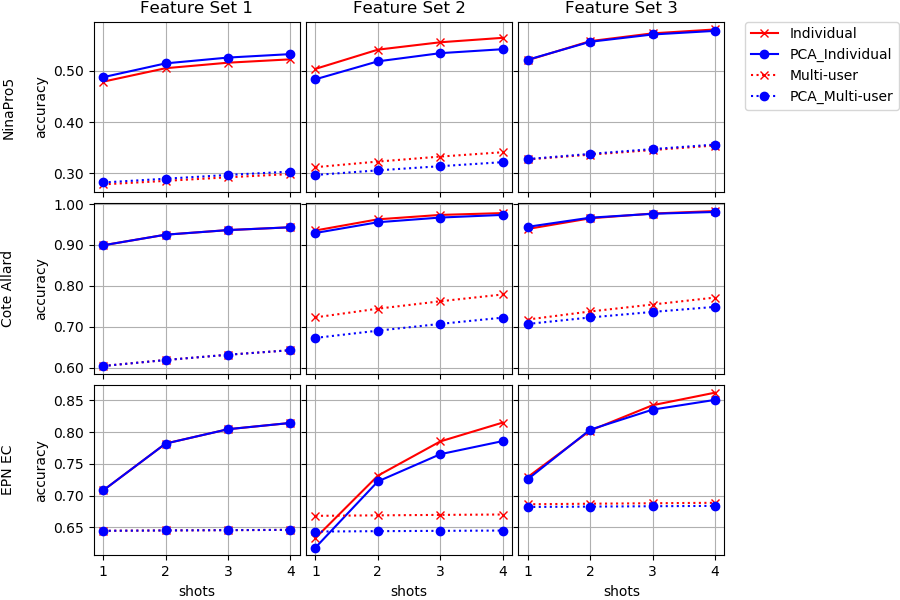

In [9]:
graphIndividuals('LDA')

<IPython.core.display.Javascript object>


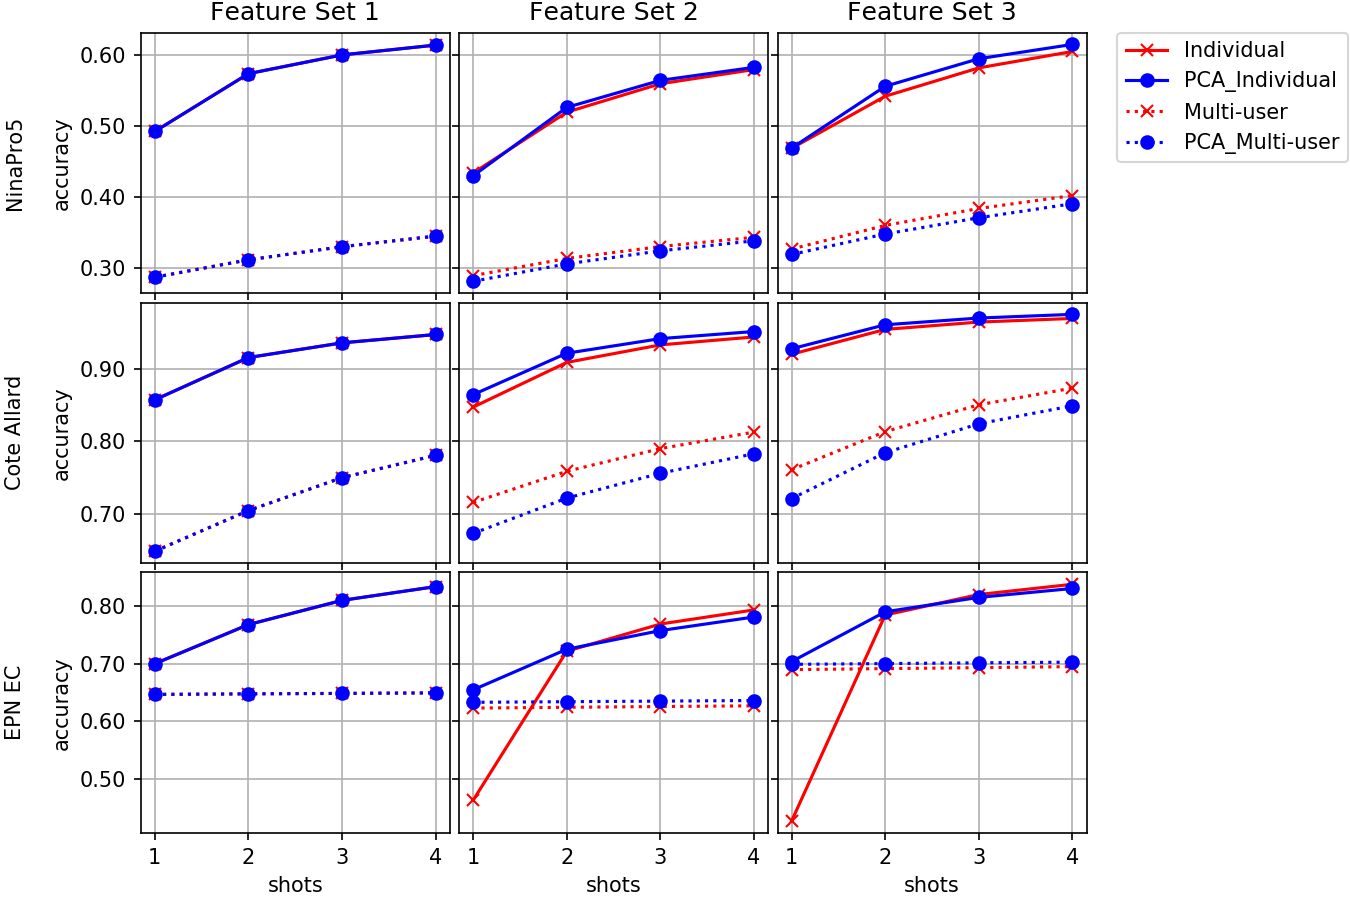

In [79]:
graphIndividuals('QDA')

# Analaysis of the three Databases

We compare the proposed model with the best baseline classifier. The best baseline for each classifier are trained with the following data:


1. LDA: with Few shots                          **(BL (Few)**
2. QDA: with Few shots using PCA                 **(BL (PCA_Few)**

<IPython.core.display.Javascript object>


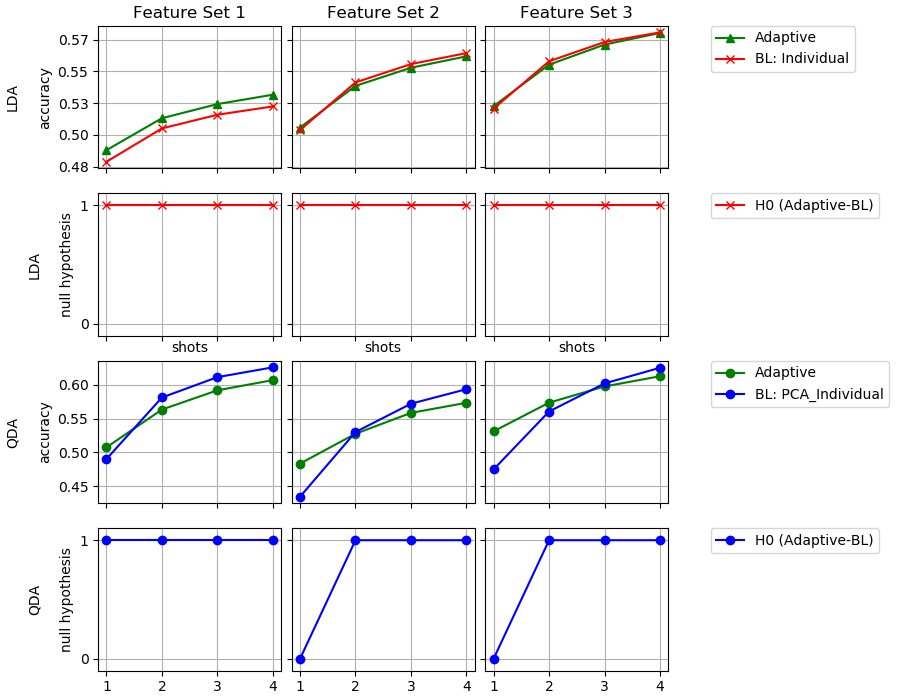

<IPython.core.display.Javascript object>


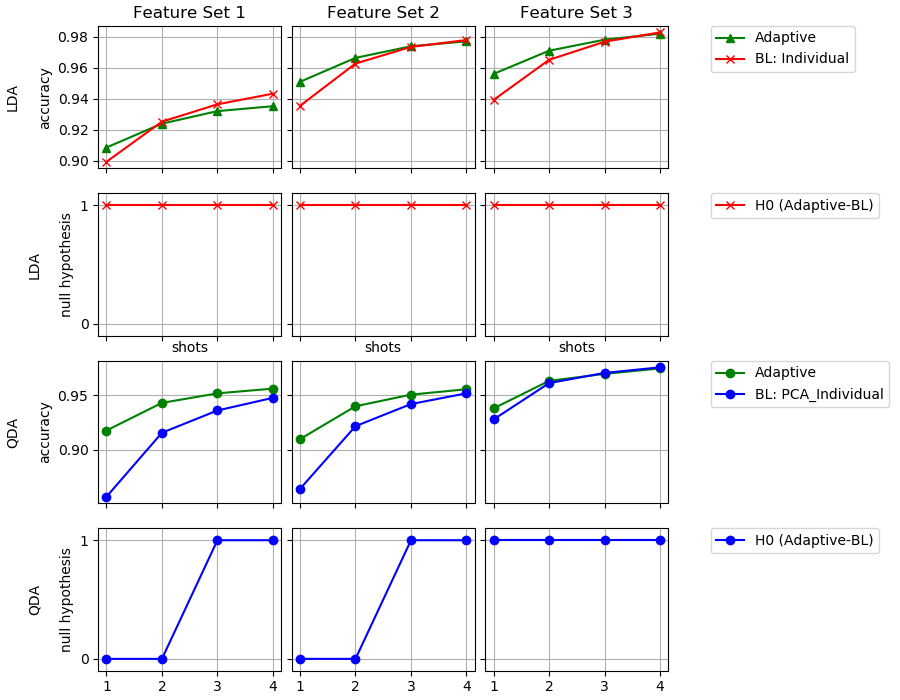

<IPython.core.display.Javascript object>


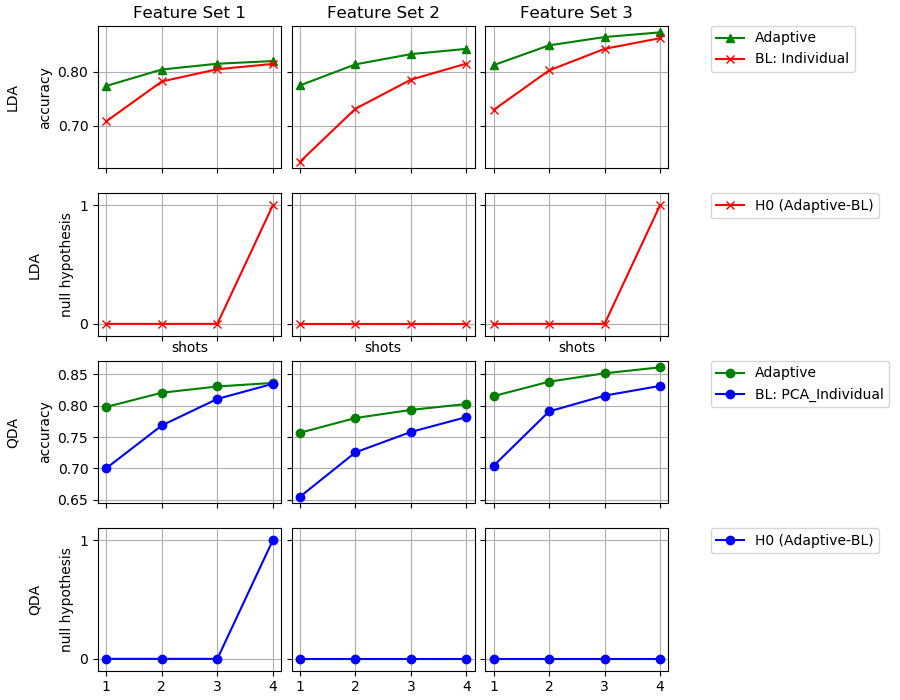

In [10]:
graphsDatabases()

<IPython.core.display.Javascript object>


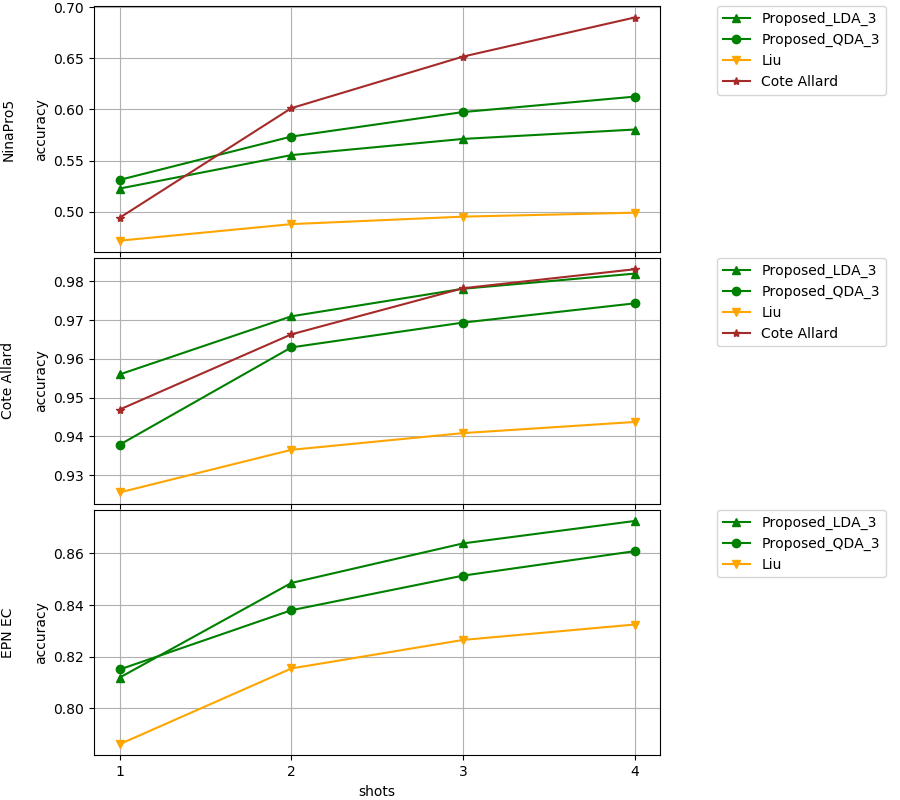

In [11]:
graphScientLiterat()

<IPython.core.display.Javascript object>


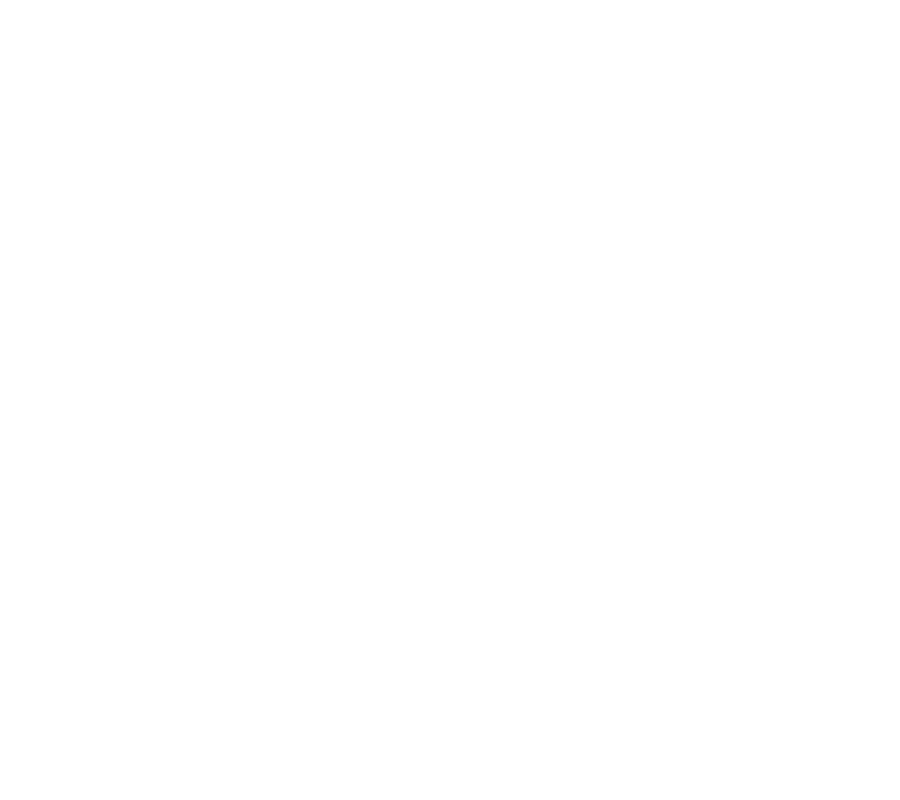

In [38]:
graphScientLiterat()

<IPython.core.display.Javascript object>


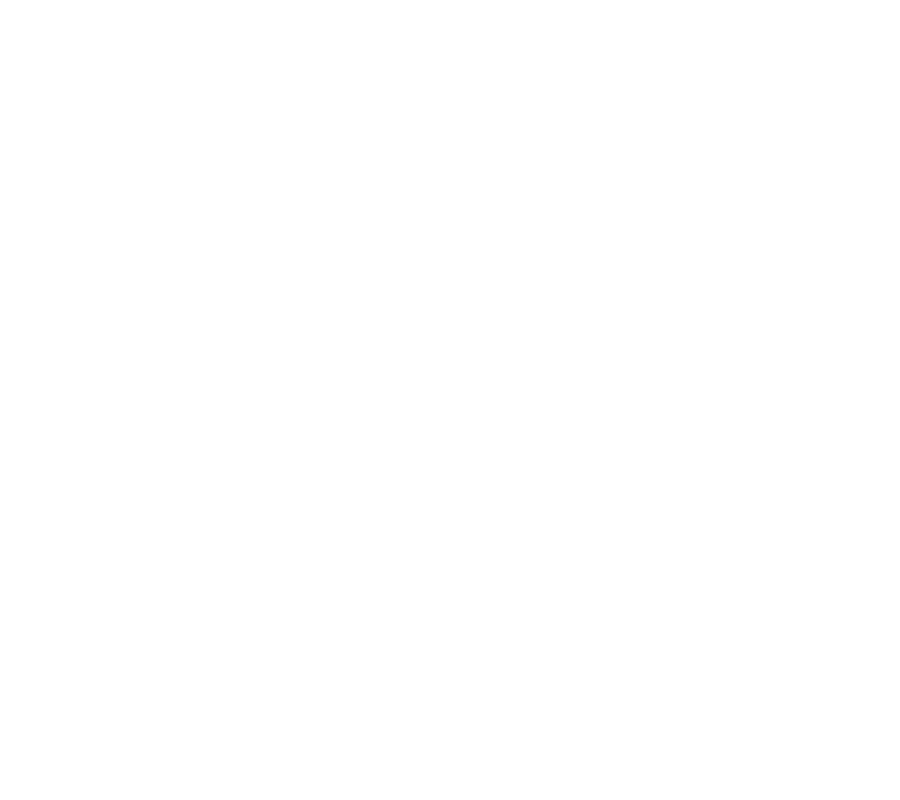

In [39]:
graphTime(timeNina5,timeCote,timeEPN)

In [40]:
graphsComparation()

NameError: name 'graphsComparation' is not defined

# Feature Set 1 (NinaPro 5):
1. Mean Absolute Value (MAV)

In [ ]:
graphsComparation(1)

# Feature Set 2:
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

In [ ]:
graphsComparation(2)

# Feature Set 3:
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)

In [ ]:
graphsComparation(3)

In [ ]:
def graphIndivsPropo(FeatureSet,Classifier):
    shot=np.arange(1,5)
    
     #PROPOSED MODELS
    
    Model='Prop1'+Classifier
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        

    
    
    #INDIVIDUAL
    
    Model='IndPca'
    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
 
        
        
    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Best model (Feature: ' + str(FeatureSet) + ' Classifier: ' + Classifier + ')')
    plt.show()

    
def graph1_R(FeatureSet,Classifier):
    
    shot=np.arange(1,5)

        
    Model='rPropo1'+Classifier    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    plt.plot(shot,Y,label=Model +str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        

    plt.xlabel('shots')
    plt.ylabel('1-r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('1-r (Feature Set: ' + str(FeatureSet) + ' Classifier: '+Classifier+')')
    plt.show()

for featureSet in range(1,4):
    graphIndivsPropo(featureSet,'LDA')
    graph1_R(featureSet,'LDA')
    graphIndivsPropo(featureSet,'QDA')
    graph1_R(featureSet,'QDA')
    

